<a href="https://colab.research.google.com/github/benmanjackson/CS290/blob/main/notebooks/Rain_In_AUS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Let's practice loading and exploring some data! :)

In [1]:
import pandas as pd

In [2]:
import numpy as np

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

In [4]:
df = pd.read_csv("https://github.com/benmanjackson/CS290/raw/main/weatherAUS.csv")

In [31]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(df, test_size=0.2)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

In [6]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [7]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [9]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [10]:
df["RainToday"].unique()

array(['No', 'Yes', nan], dtype=object)

In [11]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

In [12]:
df["RainTomorrow"].value_counts()

,count
RainTomorrow,
No,110316
Yes,31877


In [13]:
df["RainTomorrow"].value_counts( normalize=True )

,proportion
RainTomorrow,
No,0.775819
Yes,0.224181


Prep data for training/testing

In [14]:
target_variable = 'RainTomorrow'
print(df[target_variable].dtype)
print(df[target_variable].unique())

object
['No' 'Yes' nan]


In [15]:
train_set.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [16]:
train_set = train_set[[
    "MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine",
    "WindGustDir", "WindGustSpeed", "WindDir9am", "WindDir3pm",
    "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm",
    "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm", "RainTomorrow"]]

In [17]:
test_set = test_set[[
    "MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine",
    "WindGustDir", "WindGustSpeed", "WindDir9am", "WindDir3pm",
    "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm",
    "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm", "RainTomorrow"]]

In [18]:
print(train_set.columns)

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainTomorrow'],
      dtype='object')


In [19]:
X_train = train_set[[
    "MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine",
    "WindGustDir", "WindGustSpeed", "WindDir9am", "WindDir3pm",
    "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm",
    "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm"]]
y_train = train_set["RainTomorrow"]

In [20]:
X_test = test_set[[
    "MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine",
    "WindGustDir", "WindGustSpeed", "WindDir9am", "WindDir3pm",
    "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm",
    "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am", "Temp3pm"]]
y_test = test_set["RainTomorrow"]

In [28]:
y_train = y_train.fillna('No')  # Filling NaN in the target variable with the most frequent value
y_test = y_test.fillna('No')

In [29]:
num_attributes = X_train.select_dtypes(include=['int64', 'float64']).columns
cat_attributes = X_train.select_dtypes(include=['object']).columns

In [32]:
trf = [('num', Pipeline(steps=[('imputer', SimpleImputer(strategy='mean')), ('scaler', StandardScaler())]), num_attributes),
 ('cat', Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='most_frequent')),  # Fill NaN with most frequent for categorical data
        ('encoder', OneHotEncoder(handle_unknown='ignore'))    # One-hot encode categorical features
    ]), cat_attributes)]

In [33]:
col_transform = ColumnTransformer(transformers=trf)

In [34]:
pipeline = Pipeline( steps = [('pre', col_transform),
 ('clf', DecisionTreeClassifier(max_depth=3))])

In [35]:
cross_val_score( pipeline, X_train, y_train, cv=5, scoring='accuracy')

array([0.82804847, 0.82903669, 0.82959526, 0.82765436, 0.83306836])

In [38]:
model = pipeline.fit( X_train, y_train )
model

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object'))])),
                ('clf', DecisionTreeClassifier(max_depth=3))])

In [39]:
predictions = pipeline.predict( X_test )

In [40]:
cm = confusion_matrix( y_test, predictions )

In [41]:
cm

array([[21942,   750],
       [ 4250,  2150]])

[Text(0.5, 0.875, 'x[9] <= 0.976\ngini = 0.342\nsamples = 116368\nvalue = [90891, 25477]'),
 Text(0.25, 0.625, 'x[9] <= -0.012\ngini = 0.244\nsamples = 97209\nvalue = [83382.0, 13827.0]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[4] <= -0.028\ngini = 0.144\nsamples = 55418\nvalue = [51081, 4337]'),
 Text(0.0625, 0.125, 'gini = 0.342\nsamples = 6072\nvalue = [4743, 1329]'),
 Text(0.1875, 0.125, 'gini = 0.114\nsamples = 49346\nvalue = [46338, 3008]'),
 Text(0.375, 0.375, 'x[5] <= 0.529\ngini = 0.351\nsamples = 41791\nvalue = [32301, 9490]'),
 Text(0.3125, 0.125, 'gini = 0.294\nsamples = 33331\nvalue = [27351, 5980]'),
 Text(0.4375, 0.125, 'gini = 0.486\nsamples = 8460\nvalue = [4950, 3510]'),
 Text(0.75, 0.625, 'x[9] <= 1.513\ngini = 0.477\nsamples = 19159\nvalue = [7509.0, 11650.0]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[5] <= 0.529\ngini = 0.497\nsamples = 10473\nvalue = [5632, 4841]'),
 Text(0.5625, 0.125, 'gini = 0.477\nsamples = 7558\nvalue = [4594, 2964

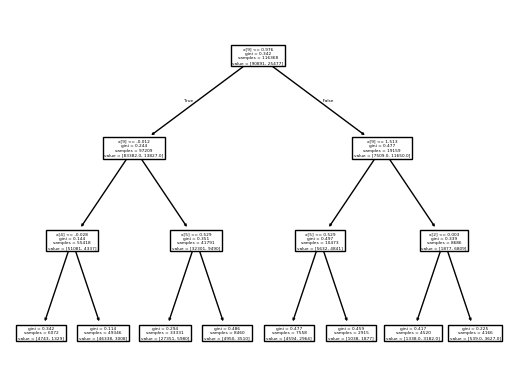

In [42]:
plot_tree( pipeline.named_steps['clf'])